In [1]:
import pandas as pd

In [2]:
# Loading 13F form data from SEC

submission_2023 = pd.read_csv("C:/Users/eukla/Desktop/University/TH Koeln/Data Viz/Project - SEC 13F fillings analysis/2023q4_form13f/SUBMISSION.tsv", sep = "\t")
infotable_2023 = pd.read_csv("C:/Users/eukla/Desktop/University/TH Koeln/Data Viz/Project - SEC 13F fillings analysis/2023q4_form13f/INFOTABLE.tsv", sep = "\t")
submission_2023["CIK"] = submission_2023["CIK"].astype(str)
coverpage_2023 = pd.read_csv("C:/Users/eukla/Desktop/University/TH Koeln/Data Viz/Project - SEC 13F fillings analysis/2023q4_form13f/COVERPAGE.tsv", sep="\t")
data_2023 = infotable_2023.merge(coverpage_2023[["ACCESSION_NUMBER","REPORTCALENDARORQUARTER", "AMENDMENTTYPE","FILINGMANAGER_NAME"]], how='left', left_on="ACCESSION_NUMBER", right_on="ACCESSION_NUMBER")

C:\Users\eukla\AppData\Local\Temp\ipykernel_15944\3926002606.py:4: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  infotable_2023 = pd.read_csv("C:/Users/eukla/Desktop/University/TH Koeln/Data Viz/Project - SEC 13F fillings analysis/2023q4_form13f/INFOTABLE.tsv", sep = "\t")


In [4]:
# Blackrock's submission

submission_2023[submission_2023["CIK"] == "1364742"] # blackrock

,ACCESSION_NUMBER,FILING_DATE,SUBMISSIONTYPE,CIK,PERIODOFREPORT
5460,0001306550-23-010335,13-NOV-2023,13F-HR,1364742,30-SEP-2023


In [5]:
# Finding Blackrock's submissions, 

br_df_2023 = data_2023[data_2023.ACCESSION_NUMBER == "0001306550-23-010335"]
br_com_df_2023 = br_df_2023[(br_df_2023.TITLEOFCLASS == "COM") & (br_df_2023.TITLEOFCLASS == "COM")]
br_top_50_2023 = br_com_df_2023.groupby("NAMEOFISSUER").sum("VALUE").sort_values("SSHPRNAMT", ascending = False)
br_top_50_2023["Period"] = "2023-09-31"
br_com_2023 = br_top_50_2023.reset_index()

In [6]:
br_top_50_2023

,INFOTABLE_SK,VALUE,SSHPRNAMT,VOTING_AUTH_SOLE,VOTING_AUTH_SHARED,VOTING_AUTH_NONE,Period
NAMEOFISSUER,,,,,,,
APPLE INC,2191594422,176587287081,1031407553,924177900,0,107229653,2023-09-31
AMAZON COM INC,2096279383,77972911915,613380364,548948016,0,64432349,2023-09-31
AT&T INC,2001041952,8034458113,534917317,480877680,0,54039638,2023-09-31
MICROSOFT CORP,2192304133,168495126833,533634606,480763340,0,52871266,2023-09-31
BANK AMERICA CORP,2001065703,13352247730,487664271,438282456,0,49381814,2023-09-31
...,...,...,...,...,...,...,...
AURORA CANNABIS INC,95287475,1,2,2,0,0,2023-09-31
CHICAGO RIVET & MACH CO,95300882,18,1,1,0,0,2023-09-31
PHIO PHARMACEUTICALS CORP,95315559,2,1,1,0,0,2023-09-31


In [7]:
submission = pd.read_csv("C:/Users/eukla/Downloads/01mar2024-31may2024_form13f/SUBMISSION.tsv", sep = "\t")
submission['CIK'] = submission["CIK"].astype(str)
infotable = pd.read_csv("C:/Users/eukla/Downloads/01mar2024-31may2024_form13f/INFOTABLE.tsv", sep = "\t")
coverpage = pd.read_csv("C:/Users/eukla/Downloads/01mar2024-31may2024_form13f\COVERPAGE.tsv", sep="\t")
data = infotable.merge(coverpage[["ACCESSION_NUMBER","REPORTCALENDARORQUARTER", "AMENDMENTTYPE","FILINGMANAGER_NAME"]], how='left', left_on="ACCESSION_NUMBER", right_on="ACCESSION_NUMBER")

<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
C:\Users\eukla\AppData\Local\Temp\ipykernel_15944\3725395953.py:4: SyntaxWarning: invalid escape sequence '\C'
  coverpage = pd.read_csv("C:/Users/eukla/Downloads/01mar2024-31may2024_form13f\COVERPAGE.tsv", sep="\t")
C:\Users\eukla\AppData\Local\Temp\ipykernel_15944\3725395953.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  infotable = pd.read_csv("C:/Users/eukla/Downloads/01mar2024-31may2024_form13f/INFOTABLE.tsv", sep = "\t")


In [8]:
submission[submission["CIK"] == "1364742"] # blackrock

,ACCESSION_NUMBER,FILING_DATE,SUBMISSIONTYPE,CIK,PERIODOFREPORT
7025,0001086364-24-007638,10-MAY-2024,13F-HR,1364742,31-MAR-2024


In [9]:
br_df = data[data.ACCESSION_NUMBER == "0001086364-24-007638"]
br_com_df = br_df[(br_df.TITLEOFCLASS == "COM") & (br_df.TITLEOFCLASS == "COM")]
br_top_50_2024 = br_com_df.groupby("NAMEOFISSUER").sum("VALUE").sort_values("SSHPRNAMT", ascending = False).head(50)
br_top_50_2024["Period"] = "2024-03-31"
br_top_50_2024 = br_top_50_2024.reset_index()

In [10]:
# keep only those holding in 2023 that were top50 in 2024

top_50_from_2024_amount_in_2023 = br_com_2023[br_com_2023["NAMEOFISSUER"].isin(br_top_50_2024["NAMEOFISSUER"].to_list())]


merged_df = pd.merge(top_50_from_2024_amount_in_2023, br_top_50_2024, on="NAMEOFISSUER", suffixes=('_2023', '_2024'))

merged_df.sort_values("SSHPRNAMT_2024", ascending=False, inplace=True)

In [11]:
merged_df

,NAMEOFISSUER,INFOTABLE_SK_2023,VALUE_2023,SSHPRNAMT_2023,VOTING_AUTH_SOLE_2023,VOTING_AUTH_SHARED_2023,VOTING_AUTH_NONE_2023,Period_2023,INFOTABLE_SK_2024,VALUE_2024,SSHPRNAMT_2024,VOTING_AUTH_SOLE_2024,VOTING_AUTH_SHARED_2024,VOTING_AUTH_NONE_2024,Period_2024
0,APPLE INC,2191594422,176587287081,1031407553,924177900,0,107229653,2023-09-31,2310986065,178428953659,1040523406,937814845,0,102708561,2024-03-31
1,AMAZON COM INC,2096279383,77972911915,613380364,548948016,0,64432349,2023-09-31,2210479155,115179176877,638536295,573047992,0,65488303,2024-03-31
3,MICROSOFT CORP,2192304133,168495126833,533634606,480763340,0,52871266,2023-09-31,2311713072,229721475248,546019859,494224314,0,51795545,2024-03-31
2,AT&T INC,2001041952,8034458113,534917317,480877680,0,54039638,2023-09-31,2110042148,9381706136,533051485,480611166,0,52440319,2024-03-31
4,BANK AMERICA CORP,2001065703,13352247730,487664271,438282456,0,49381814,2023-09-31,2110070053,18492395229,487668651,439765137,0,47903513,2024-03-31
5,PFIZER INC,2096928801,14558899465,438917681,397671282,0,41246398,2023-09-31,2211134211,11963535776,431118406,391217532,0,39900874,2024-03-31
6,CISCO SYS INC,2096545385,18427905105,342780973,310015498,0,32765475,2023-09-31,2110312491,17482817953,350286876,318530816,0,31756059,2024-03-31
8,INTEL CORP,2096847654,11806075342,332097759,299411070,0,32686690,2023-09-31,2210971820,15191543171,343933511,312487693,0,31445818,2024-03-31
7,VERIZON COMMUNICATIONS INC,2097105131,10991264326,339131883,305921852,0,33210031,2023-09-31,2211374759,14327734638,341461740,309939266,0,31522474,2024-03-31
9,COCA COLA CO,2096593103,16904691312,301977337,272022315,0,29955022,2023-09-31,2210744151,18895258871,308846991,280154754,0,28692237,2024-03-31


In [12]:
#calculate the difference in years, create columns that can be vizualized as stacked charts

merged_df["diff_in_2024"] = (merged_df["SSHPRNAMT_2024"] - merged_df["SSHPRNAMT_2023"])

merged_df["increase_in_2024"] = merged_df['diff_in_2024'].apply(lambda x: x if x > 0 else 0)
merged_df["decrease_in_2024"] = merged_df['diff_in_2024'].apply(lambda x: x if x < 0 else 0)

barh_df = merged_df[["NAMEOFISSUER","SSHPRNAMT_2023", "SSHPRNAMT_2024", "increase_in_2024", "decrease_in_2024"]]

barh_df["2023_without_decrease_for_plotting"] =  barh_df["SSHPRNAMT_2023"] + barh_df["decrease_in_2024"]

C:\Users\eukla\AppData\Local\Temp\ipykernel_15944\2520659249.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barh_df["2023_without_decrease_for_plotting"] =  barh_df["SSHPRNAMT_2023"] + barh_df["decrease_in_2024"]


# GETTING THE TICKERS FROM CUSIPS -> METADATA FROM TICKERS -> PRICE DATA FROM TICKERS

In [14]:
cusips = data_2023[data_2023["NAMEOFISSUER"].isin(barh_df["NAMEOFISSUER"])].drop_duplicates(subset=["NAMEOFISSUER"])["CUSIP"].to_list()

In [15]:
import requests

def get_ticker_from_cusip(cusip, api_key):
    headers = {
        'Content-Type': 'application/json',
        'X-OPENFIGI-APIKEY': api_key
    }
    data = [{
        "idType": "ID_CUSIP",
        "idValue": cusip
    }]
    response = requests.post('https://api.openfigi.com/v3/mapping', headers=headers, json=data)
    if response.status_code == 200:
        results = response.json()
        if results and results[0].get('data'):
            return results[0]['data'][0]['ticker']
    return None


api_key = 'f039bca6-9e17-4d36-a922-ad599aca9d3c'



In [16]:
tickers = {}

for i in cusips:
    tickers[i] = get_ticker_from_cusip(i, api_key)

In [17]:
cusips_df = pd.DataFrame(tickers.values(), index=tickers.keys())
cusips_df.to_csv("cusips.csv")

## METADATA

In [19]:
import yfinance as yf

def get_stock_metadata(ticker):
    try:
        stock = yf.Ticker(ticker)
        return stock.info
    except:
        return "None"

ticker = 'ADBE' 
metadata = get_stock_metadata(ticker)

for key, value in metadata.items():
    print(f"{key}: {value}")


sector = metadata.get('sector')
industry = metadata.get('industry')
print(f"Sector: {sector}, Industry: {industry}")


address1: 345 Park Avenue
city: San Jose
state: CA
zip: 95110-2704
country: United States
phone: 408 536 6000
fax: 408 537 6000
website: https://www.adobe.com
industry: Software - Infrastructure
industryKey: software-infrastructure
industryDisp: Software - Infrastructure
sector: Technology
sectorKey: technology
sectorDisp: Technology
longBusinessSummary: Adobe Inc., together with its subsidiaries, operates as a diversified software company worldwide. It operates through three segments: Digital Media, Digital Experience, and Publishing and Advertising. The Digital Media segment offers products, services, and solutions that enable individuals, teams, and enterprises to create, publish, and promote content; and Document Cloud, a unified cloud-based document services platform. Its flagship product is Creative Cloud, a subscription service that allows members to access its creative products. This segment serves content creators, students, workers, marketers, educators, enthusiasts, and comm

In [20]:
sectors = {}
industries = {}
for i in cusips_df[0].to_list()[:]:
    metadata = get_stock_metadata(i)
    try:
        sectors[i] = metadata.get("sector")
        industries[i] = metadata.get("industry")
    except:
         "None"

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/4I1?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=4I1&crumb=Y6MTtmOlY16
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/7HP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=7HP&crumb=Y6MTtmOlY16


In [21]:
sectors_df = pd.DataFrame(sectors.values(), index=sectors.keys())
sectors_df.to_csv("sectors.csv")

industries_df = pd.DataFrame(industries.values(), index=industries.keys())
industries_df.to_csv("industries.csv")


## PRICE DATA

In [23]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

def get_price_data(ticker, api_key):

    ts = TimeSeries(key=api_key, output_format='pandas')


    data, meta_data = ts.get_daily(symbol=ticker, outputsize='full')

    data.index.name = 'date'

    return data

# PLOTS

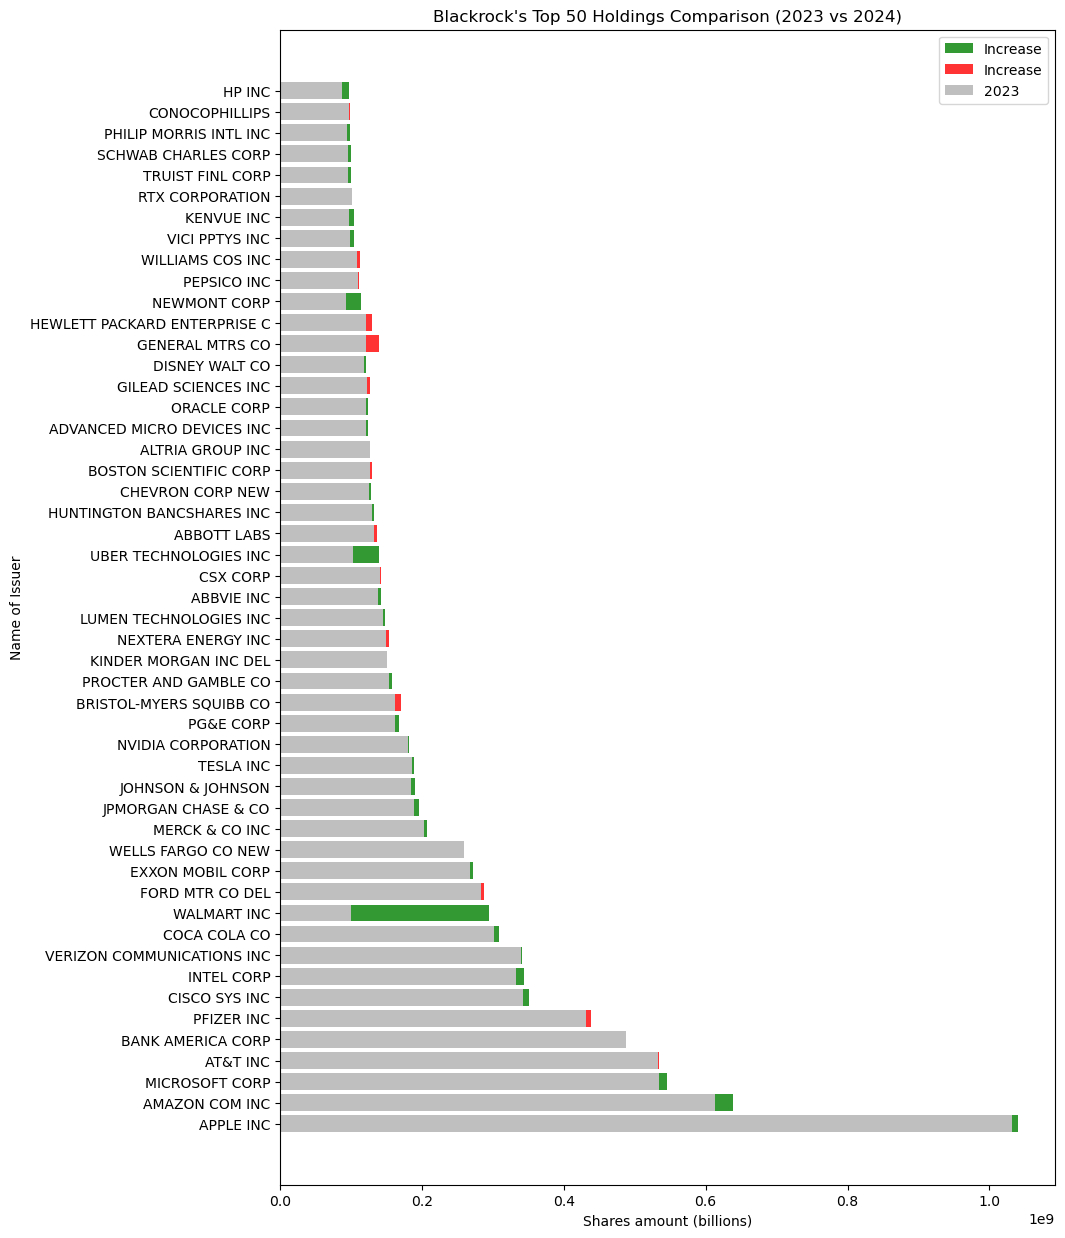

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 15))

widths = barh_df["increase_in_2024"]
# Bars for 2023
plt.barh(barh_df["NAMEOFISSUER"], width = barh_df["increase_in_2024"], left = barh_df["SSHPRNAMT_2023"],color='green', alpha=0.8, label='Increase')
plt.barh(barh_df["NAMEOFISSUER"], width = -barh_df["decrease_in_2024"], left = barh_df["2023_without_decrease_for_plotting"],color='red', alpha=0.8, label='Increase')
plt.barh(barh_df["NAMEOFISSUER"], width = barh_df["2023_without_decrease_for_plotting"],color='grey', label='2023', alpha=0.5)



plt.xlabel('Shares amount (billions)')
plt.ylabel('Name of Issuer')
plt.title('Blackrock\'s Top 50 Holdings Comparison (2023 vs 2024)')
plt.legend()
plt.show()

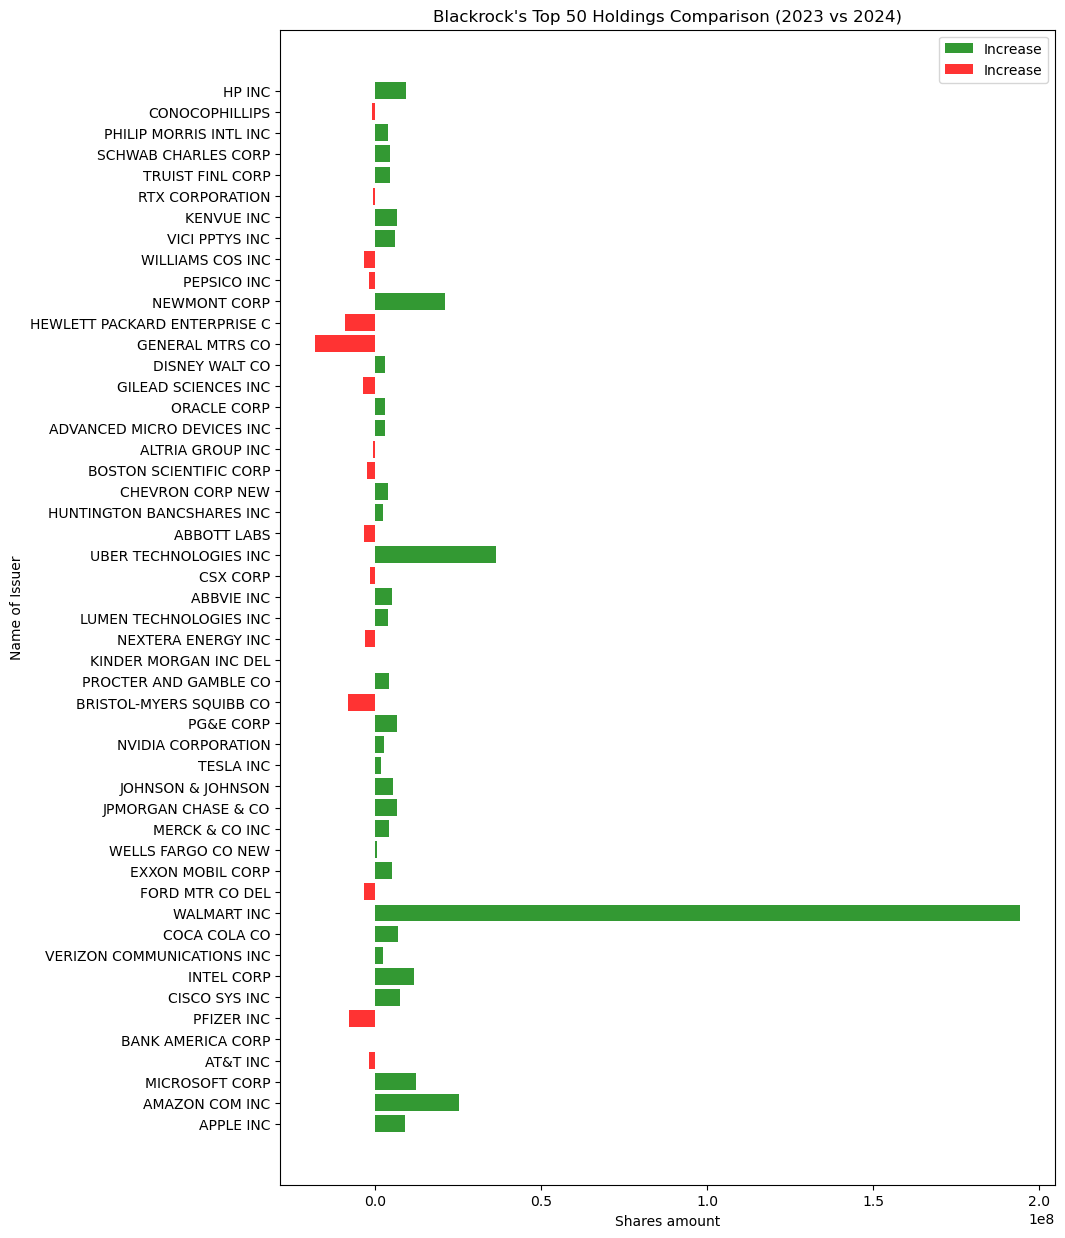

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 15))

widths = merged_df["increase_in_2024"]
# Bars for 2023
plt.barh(merged_df["NAMEOFISSUER"], width = merged_df["increase_in_2024"],color='green', align="center", alpha=0.8, label='Increase')
plt.barh(merged_df["NAMEOFISSUER"], width = merged_df["decrease_in_2024"],color='red', alpha=0.8,align="center", label='Increase')



# plt.barh(decrease['NAMEOFISSUER'], decrease['SSHPRNAMT_2024'], color='red', alpha=0.6, label='2023_decrease')

# plt.barh(increase['NAMEOFISSUER'], increase['SSHPRNAMT_2024'], color='green', alpha=0.6, label='2024_decrease')


plt.xlabel('Shares amount')
plt.ylabel('Name of Issuer')
plt.title('Blackrock\'s Top 50 Holdings Comparison (2023 vs 2024)')
plt.legend()
plt.show()

In [37]:
cusip_and_name = br_com_df[["NAMEOFISSUER", "CUSIP"]]
cusips = pd.read_csv("cusips.csv")
cusips.columns = ["cusip","ticker"]
cusips = cusips.join(cusip_and_name.set_index("CUSIP"), "cusip", how="left").drop_duplicates()




top_50_value = br_top_50_2024[["NAMEOFISSUER", "VALUE"]]
top_50_value = top_50_value.join(cusips.set_index("NAMEOFISSUER"), "NAMEOFISSUER", "left")




sectors = pd.read_csv("sectors.csv")
sectors.columns = ["ticker", "sector"]
sectors = sectors.set_index("ticker")



top_50_value = top_50_value.join(br_top_50_2023, "NAMEOFISSUER", "left", lsuffix="_2024", rsuffix="_2023")
top_50_value= top_50_value.join(sectors, "ticker")
top_50_value = top_50_value[["NAMEOFISSUER", "VALUE_2023", "VALUE_2024", "sector"]]
top_50_value.groupby("sector").sum(["VALUE_2023", "VALUE_2024"])


top_50_value["change"] = (top_50_value["VALUE_2024"] - top_50_value["VALUE_2023"])/top_50_value["VALUE_2023"]*100
top_sectors = top_50_value.groupby("sector").sum(["VALUE_2023", "VALUE_2024"])
top_sectors = top_sectors.sort_values("change", ascending=False).reset_index()
top_sectors

,sector,VALUE_2023,VALUE_2024,change
0,Technology,485858963563,656480926635,394.235639
1,Financial Services,66498791639,92904703141,232.937564
2,Communication Services,17859861777,24503432699,84.329420
3,Healthcare,124139645354,136928470218,69.612967
4,Consumer Defensive,81546848269,89205149396,55.854544
5,Industrials,11697419895,15068858613,53.817118
6,Energy,49555505853,51159051472,28.800459
7,Consumer Cyclical,128242003582,152058331470,24.258474
8,Basic Materials,3429867270,4084845772,19.096322
9,Utilities,11383182140,12411705440,17.407808


In [39]:
cusips

,cusip,ticker,NAMEOFISSUER
0,00287Y109,ABBV,ABBVIE INC
1,007903107,AMD,ADVANCED MICRO DEVICES INC
2,02209S103,MO,ALTRIA GROUP INC
3,037833100,AAPL,APPLE INC
4,00206R102,T,AT&T INC
5,110122108,BMY,BRISTOL-MYERS SQUIBB CO
6,254687106,DIS,DISNEY WALT CO
7,30231G102,XOM,EXXON MOBIL CORP
8,375558103,GILD,GILEAD SCIENCES INC
9,478160104,JNJ,JOHNSON & JOHNSON


In [56]:
from bokeh.io import show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot, row, column
from bokeh.plotting import figure
import pandas as pd

# barh_df.replace(0, np.nan, inplace=True)
source = ColumnDataSource(barh_df)

p = figure(y_range=barh_df["NAMEOFISSUER"], title='Blackrock\'s Top 50 Holdings Comparison (2023.09.30 vs 2024.03.31)', height=500)

p.yaxis.major_label_text_font_size = "4pt"

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None


p.xaxis.axis_label = 'Amount of shares (billions)'
p.yaxis.axis_label = 'Issuer'

p.hbar_stack(["2023_without_decrease_for_plotting", "decrease_in_2024", 'increase_in_2024'], y='NAMEOFISSUER', 
             height=0.5, source=source, color=["grey","red", "blue"], legend_label=['Amount in 2023', 'Increase in 2024', 'Decrease in 2024'], line_color=None)

hover = HoverTool()
hover.tooltips = [
    ("Issuer", "@NAMEOFISSUER"),
    ("Amount in 2023", "@{2023_without_decrease_for_plotting}"),
    ("Decrease in 2024", "@{decrease_in_2024}"),
    ("Increase in 2024", "@{increase_in_2024}")
]
p.add_tools(hover)

source_sector = ColumnDataSource(top_sectors)

p2 = figure(x_range=top_sectors['sector'], title="Sector Change in Value (2023.09.30 vs 2024.03.31)", height=500, width=500)

p2.vbar(x='sector', top='change', width=0.9, source=source_sector, legend_label="Change in Value (%)", color="blue")

p2.xaxis.axis_label = 'Sector'
p2.yaxis.axis_label = 'Change in Value (%)'

p2.xaxis.major_label_orientation = 0.4  # Rotate x-axis labels by 40 degrees
p2.xaxis.major_label_text_font_size = "8pt"  # Decrease font size of x-axis labels

hover_sector = HoverTool()
hover_sector.tooltips = [
    ("Sector", "@sector"),
    ("Change in Value", "@change")
]
p2.add_tools(hover_sector)

p3 = figure(width=1000, height=400, x_axis_type="datetime", title='APPL stock price data')

data_price = pd.read_csv("AAPL.csv")
data_price["date"] = pd.to_datetime(data_price["date"])

source_price = ColumnDataSource(data_price)
p3.line("date", "close", source=source_price)
p3.xaxis.axis_label = 'Price'
p3.yaxis.axis_label = 'Date'

hover_sector = HoverTool()
hover_sector.tooltips = [
    ("Price", "@close"),
    ("Date", "@date{%F}")
]
hover_sector.formatters = {
    '@date': 'datetime'
}
p3.add_tools(hover_sector)
layout = column(
    row(p, p2),
    p3, sizing_mode="stretch_both"
)

show(layout)